# Test for model testing
## Experiment 2 
Movement with statification

In [2]:
import random
import pathlib
import itertools
import collections
import os
import cv2
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load in the classifications

In [3]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
pathMovement = {}
for word in os.listdir(saveLocation):
    if word == 'AREA-2H':
        print(word)
    pathMovement[word] = None
    
f = open("keyBinds.txt", "r")
line = f.readline()
i= 0
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            pathMovement[line.split("_|_")[0]] = None
        else:
            pathMovement[line.split("_|_")[0]] = line.split("_|_")[1]
    except:
        j = 1
    line = f.readline()
f.close()
pathMovement, i

AREA-2H


({'ABOUT1': 'Vertical Circular\n',
  'ABOUT2': 'Vertical Circular\n',
  'ABOUT2(7)': 'Vertical Circular\n',
  'ABOUT2(B)': None,
  'ABOUT2(FALSE-START)': 'Unknown\n',
  'ACCEPT': 'Towards\n',
  'ACCOMMODATION-2H': 'Back and Forth\n',
  'ACCURATE': 'Up and Down\n',
  'ACHIEVE': 'Away\n',
  'ACTIVITY-THERE': 'Sideways\n',
  'ADULT': 'Horizontal Circular\n',
  'AFRAID': 'Back and Forth\n',
  'AFTERNOON': 'Local Movement\n',
  'AFTERNOON3': 'Towards\n',
  'AFTERNOON4': 'Towards\n',
  'AGAIN': 'Down\n',
  'AGAIN(8)': None,
  'AGAIN-2H': 'Local Movement\n',
  'AGAIN-AND-AGAIN': 'Up and Down\n',
  'AGES': 'Horizontal Circular\n',
  'AGREE': 'Sideways\n',
  'AIM': 'Unknown\n',
  'ALIVE': 'Towards\n',
  'ALL': 'Horizontal Circular\n',
  'ALL-2H': 'Away\n',
  'ALL-DAY': 'Up\n',
  'ALL-DAY-2H': 'Horizontal Circular\n',
  'ALL-DAY-LONG': 'Vertical Circular\n',
  'ALLOW': 'Local Movement\n',
  'ALMOST': 'Unknown\n',
  'ALMOST(FLATGO)': None,
  'ALMOST-2H': 'Unknown\n',
  'ALRIGHT': 'Unknown\n',
  '

## Primary Movement KeyBind.txt -> int

In [4]:
label_keys = {"Up\n":0, "Down\n":1, "Up and Down\n":2, "Sideways\n":3, 
              "Side to Side\n":4, "Away\n":5, "Towards\n":6, 
              "Back and Forth\n":7, "Horizontal Circular\n":8, 
              "Vertical Circular\n":9, "Local Movement\n":10, "Unknown\n": 11,}
label_keys

{'Up\n': 0,
 'Down\n': 1,
 'Up and Down\n': 2,
 'Sideways\n': 3,
 'Side to Side\n': 4,
 'Away\n': 5,
 'Towards\n': 6,
 'Back and Forth\n': 7,
 'Horizontal Circular\n': 8,
 'Vertical Circular\n': 9,
 'Local Movement\n': 10,
 'Unknown\n': 11}

# Load in the imputed dataset

In [5]:
X = []
Y = []
title = []
videoWord = []
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
for i, data in enumerate(dirData):
    if i % 2:
        continue
    coorLoad = np.loadtxt(coorDataLocation + data)
    coorShape= np.loadtxt(coorDataLocation + dirData[i + 1])
    
    try:
        coorLoad = coorLoad.reshape(coorLoad.shape[0], coorLoad.shape[1] // int(coorShape[2]), int(coorShape[2]))
    except:
        print(data, dirData[i + 1], coorLoad.shape, coorShape.shape)
    title.append(data)
    X.append(coorLoad)
len(X)

14058

#### Remove the .npy and replace .mp4

In [6]:
newTitle = []

for name in title:
    newName = name[:-4] + '.mp4'
    newTitle.append(newName)
title = np.array(newTitle)
len(title)

14058

#### Save OriginalX values

In [7]:
originalX = X
originalTitle = title
len(originalX)

14058

#### In case error ocured reload in x

In [8]:
X = originalX
title = originalTitle
len(X)

14058

## Load in usability

In [9]:
usability = {}

f = open("useability.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            usability[line.split("_|_")[0]] = None
        else:
            usability[line.split("_|_")[0]] = int(line.split("_|_")[1])
    except:
        if line != '\n':
            print(line)
    line = f.readline()
f.close()

numUsablility = {0:0,1:0,2:0,3:0,4:0}
for key, value in usability.items():
    numUsablility[value] += 1
len(usability), numUsablility

(16784, {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333})

# Load in the classifications

In [10]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
pathMovement = {}
for word in os.listdir(saveLocation):
    pathMovement[word] = None
    
f = open("keyBinds.txt", "r")
line = f.readline()
i= 0
j = 0
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            pathMovement[line.split("_|_")[0].upper()] = None
        else:
            pathMovement[line.split("_|_")[0].upper()] = line.split("_|_")[1]
    except:
        i += 1
    line = f.readline()
f.close()
pathMovement

{'ABOUT1': 'Vertical Circular\n',
 'ABOUT2': 'Vertical Circular\n',
 'ABOUT2(7)': 'Vertical Circular\n',
 'ABOUT2(B)': None,
 'ABOUT2(FALSE-START)': 'Unknown\n',
 'ACCEPT': 'Towards\n',
 'ACCOMMODATION-2H': 'Back and Forth\n',
 'ACCURATE': 'Up and Down\n',
 'ACHIEVE': 'Away\n',
 'ACTIVITY-THERE': 'Sideways\n',
 'ADULT': 'Horizontal Circular\n',
 'AFRAID': 'Back and Forth\n',
 'AFTERNOON': 'Local Movement\n',
 'AFTERNOON3': 'Towards\n',
 'AFTERNOON4': 'Towards\n',
 'AGAIN': 'Down\n',
 'AGAIN(8)': None,
 'AGAIN-2H': 'Local Movement\n',
 'AGAIN-AND-AGAIN': 'Up and Down\n',
 'AGES': 'Horizontal Circular\n',
 'AGREE': 'Sideways\n',
 'AIM': 'Unknown\n',
 'ALIVE': 'Towards\n',
 'ALL': 'Horizontal Circular\n',
 'ALL-2H': 'Away\n',
 'ALL-DAY': 'Up\n',
 'ALL-DAY-2H': 'Horizontal Circular\n',
 'ALL-DAY-LONG': 'Vertical Circular\n',
 'ALLOW': 'Local Movement\n',
 'ALMOST': 'Unknown\n',
 'ALMOST(FLATGO)': None,
 'ALMOST-2H': 'Unknown\n',
 'ALRIGHT': 'Unknown\n',
 'ALRIGHT-2H': 'Unknown\n',
 'ALRIGH

## Primary Movement KeyBind.txt -> int

In [11]:
label_keys = {"Up\n":0, "Down\n":1, "Up and Down\n":2, "Sideways\n":3, 
              "Side to Side\n":4, "Away\n":5, "Towards\n":6, 
              "Back and Forth\n":7, "Horizontal Circular\n":8, 
              "Vertical Circular\n":9, "Local Movement\n":10, "Unknown\n": 11,}
label_keys

{'Up\n': 0,
 'Down\n': 1,
 'Up and Down\n': 2,
 'Sideways\n': 3,
 'Side to Side\n': 4,
 'Away\n': 5,
 'Towards\n': 6,
 'Back and Forth\n': 7,
 'Horizontal Circular\n': 8,
 'Vertical Circular\n': 9,
 'Local Movement\n': 10,
 'Unknown\n': 11}

# Assign each data point to a classification
## Each of these will be classified to X and Y

In [12]:
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
videoWord = []
numBad = 0
numNone = 0
for i, data in enumerate(dirData):
    data = data.upper()
    if i % 2:
        continue
    try:
        movement = pathMovement[data.split("_")[0]]
        videoWord.append(label_keys[movement])
    except:
        if pathMovement[data.split("_")[0]] is None:
            numNone += 1
        numBad += 1
        print(data)
        videoWord.append(99) 
numBad, numNone, len(dirData)

BEDFRAME_BCHA2C7A_2180_4030.NPY
BEFORE2_BFPB1C2A_34436_34766.NPY
BOTTOM2_BSSA1C2B_70870_71770.NPY
CALL_BFPB1C2A_126318_126648.NPY
DAYBREAK_BCHA2C7A_39940_41160.NPY
DON'T1-2H_BSSA1C2B_31650_32140.NPY
FIND1_SATA2C7A_43760_44070.NPY
FUNNY_AMMA1C2A_53334_53714.NPY
HAVE-2H_AMGA1C2A_25120_25300.NPY
HAVE-2H_MTFB3C9A_82080_82340.NPY
HAVE-2H_PDSA2C7A_73770_73990.NPY
HAVE-2H_SBS1A3C7A_2140_3080.NPY
HAVE-2H_SGMB2C7A_102690_102810.NPY
HAVE-2H_SPKA1C2A_22050_22300.NPY
HAVE-2H_SPKA3C9A_49165_49465.NPY
HAVE-2H_SSSB1C2A_30329_30660.NPY
HAVE-2H_SSSB1C2A_9640_9930.NPY
HAVE-NONE-OF-2H_MKB2A1C2A_62720_63040.NPY
HAVE-NONE_PCNB2C7A_27370_27710.NPY
HAVE_AAM1A1C2A_3480_3930.NPY
HAVE_AAM1A1C2A_74455_74595.NPY
HAVE_AAM1A1C2A_81965_82325.NPY
HAVE_AAM1A1C2A_85525_85855.NPY
HAVE_AASB1C2A_13818_14030.NPY
HAVE_ACAA1C2A_20760_20980.NPY
HAVE_ACAA1C2A_22020_22160.NPY
HAVE_ACAA2C7A_4920_5280.NPY
HAVE_ACAA2C7A_74299_74489.NPY
HAVE_ACAA2C7A_79719_79909.NPY
HAVE_ACAA2C7A_82559_82699.NPY
HAVE_ADCB2C6III_70390_70610.NPY
HAVE

(6299, 6299, 28116)

## Append X values with a Y data label

In [13]:
newX = []
newTitle = []
Y = []
print(len(X), len(videoWord))
for i, y in enumerate(videoWord):
    # 99 was assigned if an error occured when importing and 11 is for unknown datalabels
    if y != 99 and y != 11:
        newX.append(X[i])
        newTitle.append(title[i])
        Y.append(y)
X = newX
title = np.array(newTitle)
print(len(X), len(title))

14058 14058
6410 6410


## Remove X and Y that are low usability

In [14]:
print(len(X),len(Y))
newX = []
newY = []
for i in range(len(X)):
    if usability[title[i]] >= 3:
        newX.append(X[i])
        newY.append(Y[i])
X = np.array(newX)
Y = np.array(newY)
print(len(X),len(Y))

6410 6410
3258 3258


## check shape of data

In [15]:
newX = []
newY = []
for i in range(len(X)):
    try:
        if X[i].shape[1] == 33 or X[i].shape[2] == 3:
            newX.append(X[i])
            newY.append(Y[i])
    except:
        continue
X = np.array(newX)
Y = np.array(newY)

In [16]:
print(len(X), len(Y), len(originalX))
print(X.shape)

3258 3258 14058
(3258, 40, 33, 3)


# Reshape insto 1d shape

In [17]:
newX = []
for i in range(len(X)):
    newInfo = []
    for frame in X[i]:
        for joint in frame:
            for coor in joint:
                newInfo.append(coor)
    newX.append(newInfo)
X = np.array(newX)
print(X.shape)

(3258, 3960)


## Create Training Splits

In [18]:
import random
import pandas as pd

# Random state
seed_value = 42  
random.seed(seed_value)

# Choose the test size
pick = False

yCount = {}
if pick:
    testSize = 0.33
else:
    for value in Y:
        if value in yCount:
            yCount[value] += 1
        else:
            yCount[value] = 1
    trainSize = min(yCount.values()) * len(yCount.keys())
    testSize =  1 -(trainSize / len(Y))

# set up random picking
picked = {i:0 for i in range(len(X))}
Yset = set(Y)
uniqueYs = len(Yset)
Ordered_X_train, X_test, Ordered_y_train, y_test = ([],[],[],[])

# Randomly add and even amoung of training data based off test size
numAdded = 1
while ((len(Ordered_X_train)/ len(X)) <  (1 - testSize)):
    for y in range(uniqueYs):
        index = random.randint(0, len(Y) - 1)
        while picked[index] == 1 or not Y[index] == y:
            index = random.randint(0, len(Y) - 1)
            if yCount[y] <= numAdded:
                print("too many added", yCount[y], numAdded)
                break
        picked[index] = 1
        Ordered_X_train.append(X[index])
        Ordered_y_train.append(y)
    numAdded += 1
print("Ordered Training set created")
    
# Add remaing values into test
for i, bool in picked.items():
    if not bool:
        X_test.append(X[i])
        y_test.append(Y[i])
print("Test set created")

# Randomly order training:
X_train, y_train = ([],[])
pickedReorder = {i:0 for i in range(len(Ordered_y_train))}
print(len(pickedReorder.values()))
index = random.randint(0, len(Ordered_y_train) - 1)
num = 0
while(np.prod(list(pickedReorder.values())) == 0):
    while pickedReorder[index] == 1:
        index = random.randint(0, len(Ordered_y_train) - 1)
    pickedReorder[index] = 1
    X_train.append(Ordered_X_train[index])
    y_train.append(Ordered_y_train[index])
    num += 1
print("Training set created")

# Print amounts of percentage of each Y value in training set
vCount = pd.DataFrame(y_train)
print(vCount.value_counts() / len(X))


too many added 84 84
Ordered Training set created
Test set created
924
Training set created
0     0.025783
1     0.025783
2     0.025783
3     0.025783
4     0.025783
5     0.025783
6     0.025783
7     0.025783
8     0.025783
9     0.025783
10    0.025783
Name: count, dtype: float64


# Save Data

In [39]:
np.savetxt("experiment2/X_train.npy", X_train)
np.savetxt("experiment2/X_test.npy", X_test)
np.savetxt("experiment2/y_train.npy", y_train)
np.savetxt("experiment2/y_test.npy", y_test)

# Data Analysis

In [19]:
import pandas as pd
unique_classes, counts = np.unique(y_train, return_counts=True)

invs_label_key = {label_keys[key]: key for key in label_keys.keys()}
class_counts_df = pd.DataFrame({'Class': [invs_label_key[i][:-1] for i in unique_classes], 'Count': counts})

for label, count in zip(unique_classes, counts):
    print(f"Class {invs_label_key[label][:-1]}: {count} samples")
class_counts_df

Class Up: 84 samples
Class Down: 84 samples
Class Up and Down: 84 samples
Class Sideways: 84 samples
Class Side to Side: 84 samples
Class Away: 84 samples
Class Towards: 84 samples
Class Back and Forth: 84 samples
Class Horizontal Circular: 84 samples
Class Vertical Circular: 84 samples
Class Local Movement: 84 samples


,Class,Count
0,Up,84
1,Down,84
2,Up and Down,84
3,Sideways,84
4,Side to Side,84
5,Away,84
6,Towards,84
7,Back and Forth,84
8,Horizontal Circular,84
9,Vertical Circular,84


In [35]:
unique_classes, counts = np.unique(y_test, return_counts=True)

invs_label_key = {label_keys[key]: key for key in label_keys.keys()}
class_counts_df = pd.DataFrame({'Class': [invs_label_key[i][:-1] for i in unique_classes], 'Count': counts})
class_counts_df

,Class,Count
0,Up,73
1,Down,363
2,Up and Down,292
3,Sideways,346
4,Side to Side,332
5,Away,387
6,Towards,50
7,Back and Forth,1
8,Horizontal Circular,19
9,Vertical Circular,26


## Linear Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
lda.score(X_test, y_test)

0.1610968294772922

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# data to manipulate
ldas = []
for solver in ['svd', 'lsqr']:
    lda = LinearDiscriminantAnalysis(solver=solver)
    lda.fit(X_train, y_train)
    ldas.append(lda)
    print('\n', solver)
    # Error calculation
    print("training acuracy: ", lda.score(X_train, y_train))
    print("validation acuracy: ", lda.score(X_test, y_test))
    print("training error: ", 1 - lda.score(X_train, y_train))
    print("validation error: ", 1 - lda.score(X_test, y_test))


 svd
training acuracy:  0.95995670995671
validation acuracy:  0.1610968294772922
training error:  0.04004329004328999
validation error:  0.8389031705227078

 lsqr
training acuracy:  0.09090909090909091
validation acuracy:  0.11568123393316196
training error:  0.9090909090909091
validation error:  0.884318766066838


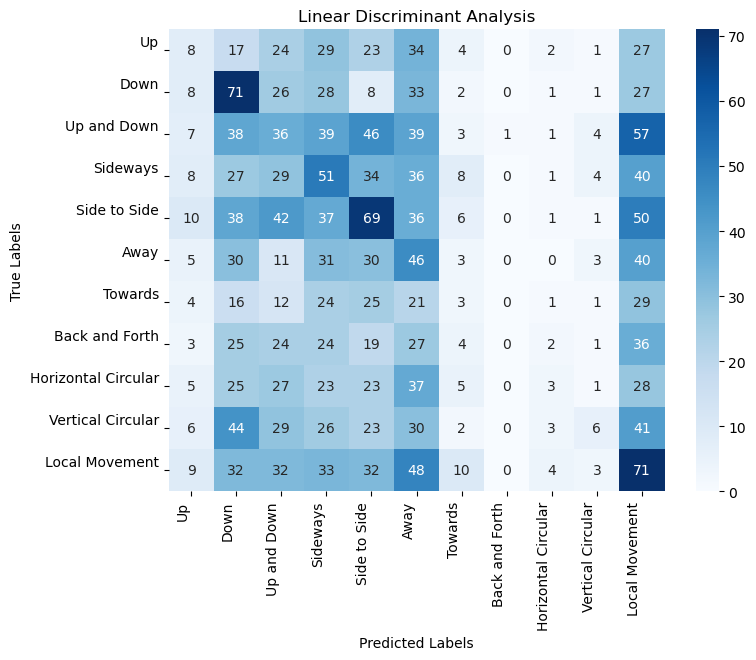

In [ ]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

y_pred = ldas[0].predict(X_test)
cm = metrics.confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## Quadratic Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
# Error calculation
print("training acuracy: ", qda.score(X_train, y_train))
print("validation acuracy: ", qda.score(X_test, y_test))
print("training error: ", 1 - qda.score(X_train, y_train))
print("validation error: ", 1 - qda.score(X_test, y_test))

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


training acuracy:  1.0
validation acuracy:  0.09554413024850043
training error:  0.0
validation error:  0.9044558697514996


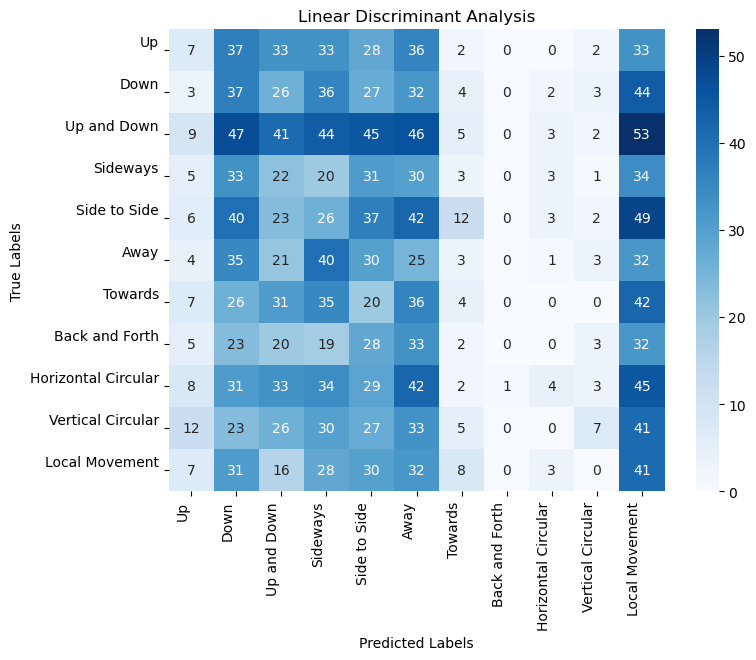

In [ ]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

y_pred = qda.predict(X_test)
cm = metrics.confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## Gaussian Naive Bayes
models each as conforming to a Gaussian (normal) distribution

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("training acuracy: ", gnb.score(X_train, y_train))
print("validation acuracy: ", gnb.score(X_test, y_test))
print("training error: ", 1 - gnb.score(X_train, y_train))
print("validation error: ", 1 - gnb.score(X_test, y_test))


training acuracy:  0.24458874458874458
validation acuracy:  0.14610111396743788
training error:  0.7554112554112554
validation error:  0.8538988860325621


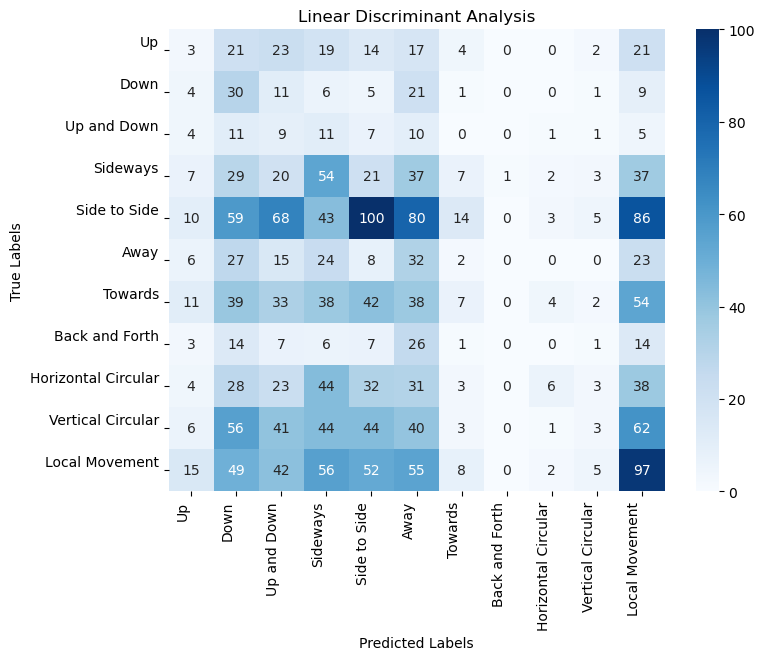

In [ ]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

y_pred = gnb.predict(X_test)
cm = metrics.confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
bottom = 0
top = 31
step = 5
predictClass = []
kNeighborsPredictions = []
for weight in ['uniform', 'distance']:
    for i in range(bottom, top,step):
        if i == 0:
            clf = KNeighborsClassifier(n_neighbors=1, weights=weight)
        else:
            clf = KNeighborsClassifier(n_neighbors=i, weights=weight)
        clf.fit(X_train, y_train)
        kNeighborsPredictions.append(clf)
    for neigh in kNeighborsPredictions:
        print(neigh)
        # Error calculation
        print("training acuracy: ", neigh.score(X_train, y_train))
        print("validation acuracy: ", neigh.score(X_test, y_test))
        print("training error: ", 1 - neigh.score(X_train, y_train))
        print("validation error: ", 1- neigh.score(X_test, y_test))
        print("\n")



KNeighborsClassifier(n_neighbors=1)
training acuracy:  1.0
validation acuracy:  0.16323907455012854
training error:  0.0
validation error:  0.8367609254498715


KNeighborsClassifier()
training acuracy:  0.4015151515151515
validation acuracy:  0.149528706083976
training error:  0.5984848484848485
validation error:  0.8504712939160239


KNeighborsClassifier(n_neighbors=10)
training acuracy:  0.31277056277056275
validation acuracy:  0.14867180805484148
training error:  0.6872294372294372
validation error:  0.8513281919451585


KNeighborsClassifier(n_neighbors=15)
training acuracy:  0.275974025974026
validation acuracy:  0.15766923736075408
training error:  0.724025974025974
validation error:  0.8423307626392459


KNeighborsClassifier(n_neighbors=20)
training acuracy:  0.25432900432900435
validation acuracy:  0.1520994001713796
training error:  0.7456709956709957
validation error:  0.8479005998286204


KNeighborsClassifier(n_neighbors=25)
training acuracy:  0.24134199134199133
validation a

## DecisionTreeClassifier
A decision tree classifier.

In [41]:
from sklearn.tree import DecisionTreeClassifier
for criteria in ["gini", "entropy", "log_loss"]:
    for splitter in ["best", "random"]:
        deTree = DecisionTreeClassifier(criterion=criteria, splitter=splitter, max_depth=10, min_samples_split=10)
        print('criteria: ', criteria, 'splitter: ', splitter)
        deTree.fit(X_train, y_train)

        print("training acuracy: ", deTree.score(X_train, y_train))
        print("validation acuracy: ", deTree.score(X_test, y_test))
        print("training error: ", 1 - deTree.score(X_train, y_train))
        print("validation error: ", 1- deTree.score(X_test, y_test))


criteria:  gini splitter:  best
training acuracy:  0.45021645021645024
validation acuracy:  0.11182519280205655
training error:  0.5497835497835497
validation error:  0.8881748071979434
criteria:  gini splitter:  random
training acuracy:  0.4621212121212121
validation acuracy:  0.12382176520994002
training error:  0.5378787878787878
validation error:  0.87617823479006
criteria:  entropy splitter:  best
training acuracy:  0.7045454545454546
validation acuracy:  0.143101970865467
training error:  0.2954545454545454
validation error:  0.856898029134533
criteria:  entropy splitter:  random
training acuracy:  0.5595238095238095
validation acuracy:  0.15038560411311053
training error:  0.44047619047619047
validation error:  0.8496143958868895
criteria:  log_loss splitter:  best
training acuracy:  0.7056277056277056
validation acuracy:  0.14481576692373607
training error:  0.2943722943722944
validation error:  0.8551842330762639
criteria:  log_loss splitter:  random
training acuracy:  0.55086

## RandomForestClassifier
A random forest classifier.

In [40]:
from sklearn.ensemble import RandomForestClassifier

for criteria in ["gini", "entropy", "log_loss"]:
    rfc = RandomForestClassifier(criterion=criteria, min_samples_split=10, max_depth=8)
    rfc.fit(X_train, y_train)
    print(rfc, criteria)
    print("training acuracy: ", rfc.score(X_train, y_train))
    print("validation acuracy: ", rfc.score(X_test, y_test))
    print("training error: ", 1 - rfc.score(X_train, y_train))
    print("validation error: ", 1- rfc.score(X_test, y_test))

RandomForestClassifier(max_depth=8, min_samples_split=10) gini
training acuracy:  0.9015151515151515
validation acuracy:  0.2185089974293059
training error:  0.09848484848484851
validation error:  0.781491002570694
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10) entropy
training acuracy:  0.9967532467532467
validation acuracy:  0.20865467009425878
training error:  0.0032467532467532756
validation error:  0.7913453299057412
RandomForestClassifier(criterion='log_loss', max_depth=8, min_samples_split=10) log_loss
training acuracy:  0.9935064935064936
validation acuracy:  0.21165381319622964
training error:  0.00649350649350644
validation error:  0.7883461868037703


# Save Data

In [ ]:
X_train

# Save Model

In [22]:
import pickle

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
with open('./experiment2/LDA.pkl', 'wb') as file:
    pickle.dump(lda, file)

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
with open('./experiment2/QDA.pkl', 'wb') as file:
    pickle.dump(qda, file)

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
with open('./experiment2/GNB.pkl', 'wb') as file:
    pickle.dump(gnb, file)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
with open('./experiment2/KNN.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10, min_samples_split=10)
dtc.fit(X_train, y_train)
with open('./experiment2/DTC.pkl', 'wb') as file:
    pickle.dump(dtc, file)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', min_samples_split=10, max_depth=8)
rfc.fit(X_train, y_train)
with open('./experiment2/RFC.pkl', 'wb') as file:
    pickle.dump(rfc, file)